In [1]:
import pandas as pd, numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.image import imread

#### Recordar: 
**TODA** matriz simétrica $A$ puede descomponerse como:

$$
A = E\Lambda E^{T}
$$

donde $E$ es una matrix ortogonal cuyas columnas son los eigenvectores de $A$, $\Lambda$ una matriz diagonal que contiene los eigenvalores de $A$, y se cumple que $EE^{T} = E^{T}E= I$

Esta factorización es útil, pero tiene la 'limitante' que sólo es para matrices simétricas, 
y en su forma más general, para matrices cuadradas.

### Existe una factorización muy importante, que además aplica para cualquier matriz

#### Descomposición en Valores Singulares (Singular Value Decomposition -SVD) 

Se aplica a cualquier matriz de tamaño $m \times n$ y proporciona una forma de descomponer dicha matriz en el producto de tres matrices más simples.

**Explicación:**

Consideremos una matriz $A$ de tamaño $m \times n$. La SVD descompone $A$ en tres matrices:

$$ A = U \Sigma V^T $$

1. **$U$**: Esta es una matriz ortogonal de $m \times m$. Las columnas de $U$, conocidas como los vectores singulares izquierdos, son eigenvectores de $AA^T$.

2. **$\Sigma$**: Esta es una matriz **diagonal** de $m \times n$ (no necesariamente cuadrada). Los elementos no cero de $\Sigma$, que están en la diagonal, se conocen como los valores singulares de $A$. Estos valores singulares son las raíces cuadradas de los eigenvalores de $A^TA$ y $AA^T$. Siempre son no negativos y generalmente se organizan en orden descendente. El número de valores singulares no cero es igual al rango de la matriz $A$.

**Nota:** Rango de una matriz =  número máximo de columnas linealmente independientes

3. **$V^T$**: Esta es la transpuesta de una matriz ortogonal de $n \times n$. Las columnas de $V$ (y por lo tanto las filas de $V^T$) son los vectores singulares derechos de $A$ y son eigenvectores de $A^TA$.

**Importancia y Aplicaciones:**

- **Reducción de Dimensionalidad**: En aplicaciones como el Análisis de Componentes Principales (PCA), el SVD se utiliza para la reducción de dimensionalidad. Solo se conservan los primeros valores singulares (que son los más grandes) y sus correspondientes vectores singulares.

- **Pseudoinversa**

- **Compresión de Datos**

#### Relación PCA con SVD

Como $ A = U \Sigma V^T $, entonces $ A^TA = V \Sigma^T U^T  U \Sigma V^T $

Como $U$ es una matriz ortogonal, se sigue que $U^T  U = I$, y entonces la expresión se convierte en:

$$
A^TA = V \Sigma^T\Sigma V^T = V \Lambda V^T \; \text{con} \; \Sigma^T\Sigma= \Lambda
$$

que es justo la 'eigendescomposición' de la matriz simétrica $A^TA$ del Teorema Espectral

En python usamos la funcion `svd()` de la librería linear algebra

### Ejemplo:

In [2]:
A=np.array([
    [1,2,3],
    [4,5,6]
])

In [3]:
U, Sig, Vt = la.svd(A)

In [4]:
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

In [5]:
Sig

array([9.508032  , 0.77286964])

In [6]:
Sig=np.diag(Sig)
Sigma=np.hstack([Sig,np.zeros((2,1))])#horizontal stack: "apila hacia la derecha'
Sigma

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [7]:
Vt

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [8]:
U@Sigma@Vt

array([[1., 2., 3.],
       [4., 5., 6.]])

Esta factorización, al igual que la diagonalización de matrices simétricas, descompone
la acción de una matriz $M$ en 3 pasos: 
    1. Rotación
    2. Escalamiento y rotación
    3. Otra Rotación

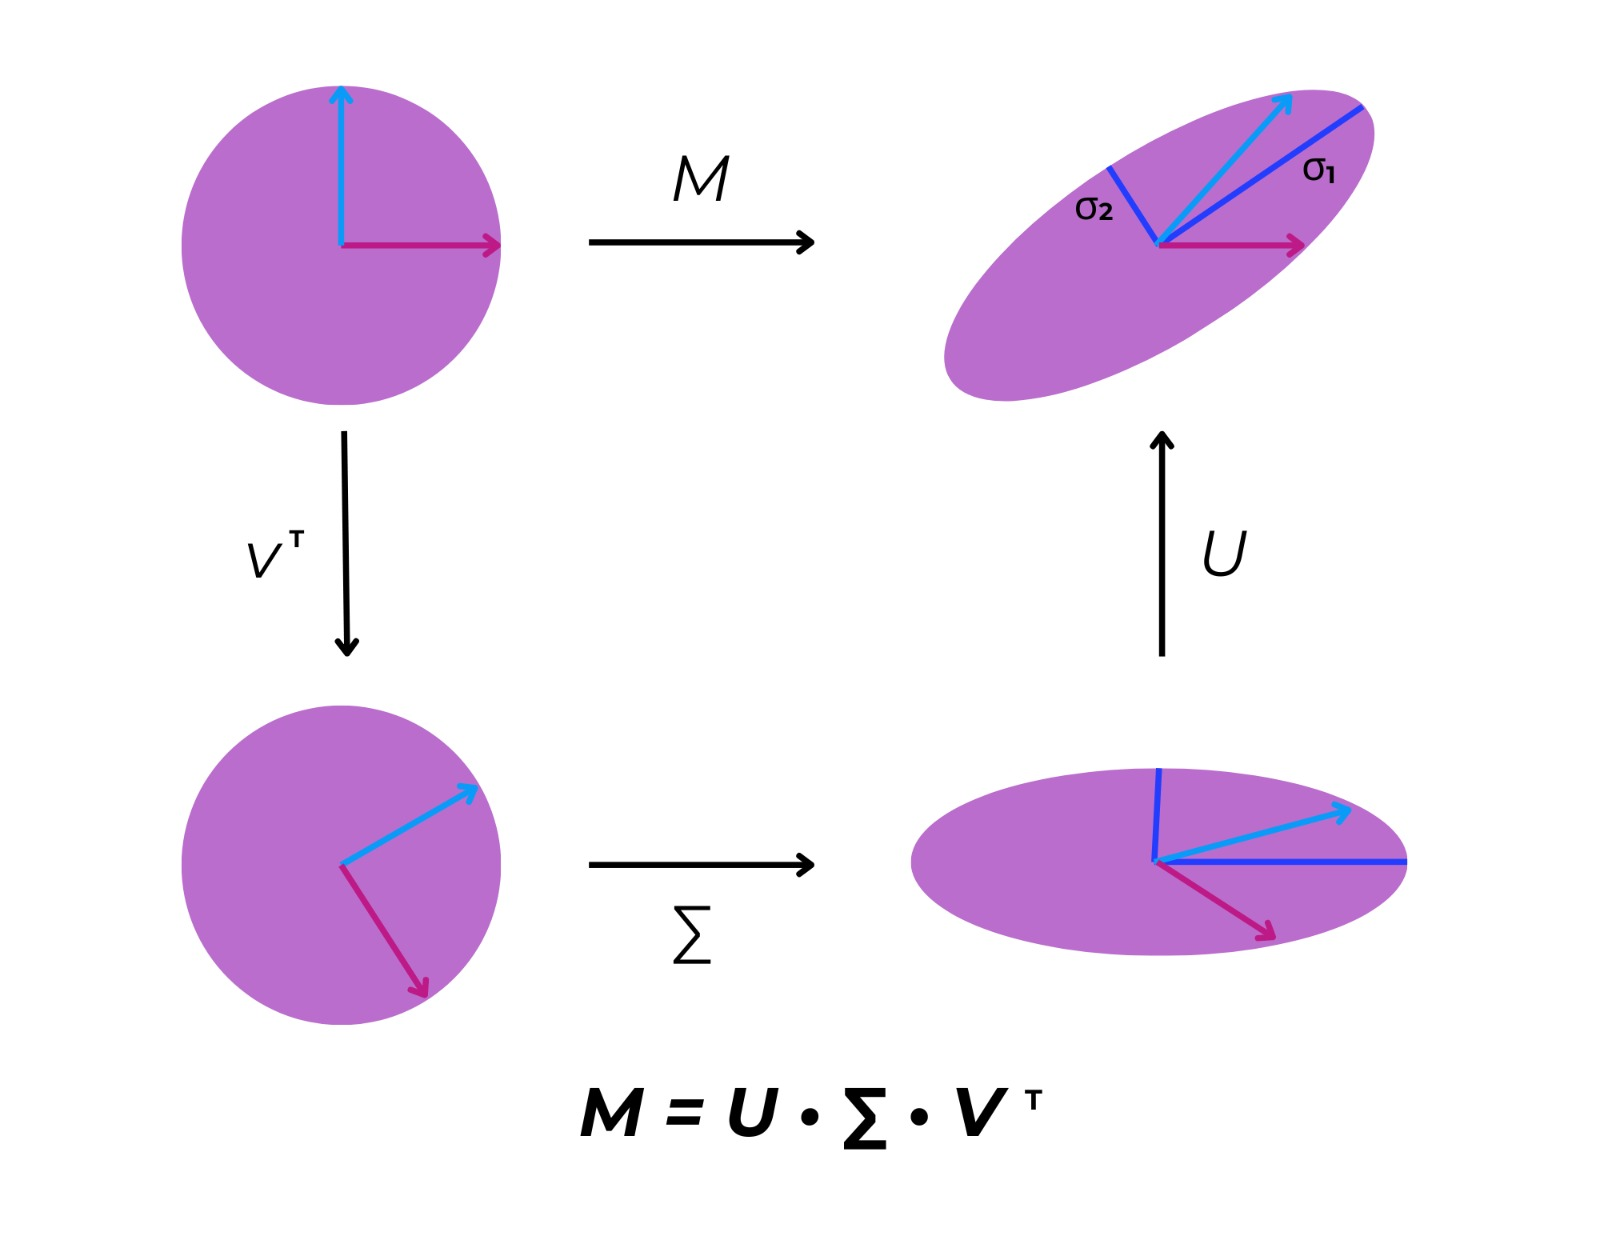

In [9]:
#función para graficar el efecto de multiplicar una matriz por un vector
def graf_matmul(A,v):
    C=A
    v3=v
    #multiplicación
    resulting_v3=np.dot(C,v3)

    #Crear la gráfica
    plt.figure(figsize=(8,6))
    plt.quiver(0,0,v3[0],v3[1],angles='xy',scale_units='xy',scale=1,color='blue',label=r'$\mathbf{v}$')
    plt.quiver(0,0,resulting_v3[0],resulting_v3[1],angles='xy',scale_units='xy',scale=1,color='red',label=r'$\mathbf{Av}$')
    
    #Límites
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.gca().set_aspect('equal',adjustable='box')
    
    #Agregar cuadrícula, etiquetas,títulos y leyendas. 
    plt.grid(True)
    plt.axhline(y=0,color='k')
    plt.axvline(x=0,color='k')
    plt.xlabel('eje X')
    plt.ylabel('eje Y')
    plt.title('Efecto de multiplizar la matrix C por el vector (3,2)')
    plt.legend()

    #mostrando el gráfico
    plt.show()
    print(resulting_v3)

In [10]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
Vt

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [12]:
Sigma

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [14]:
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

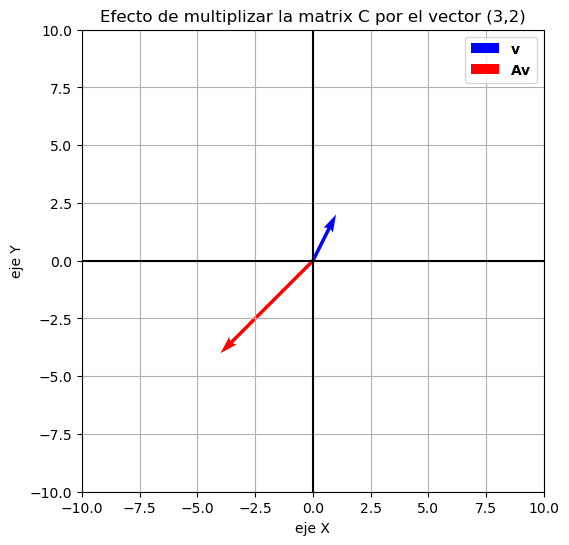

[-4 -4]






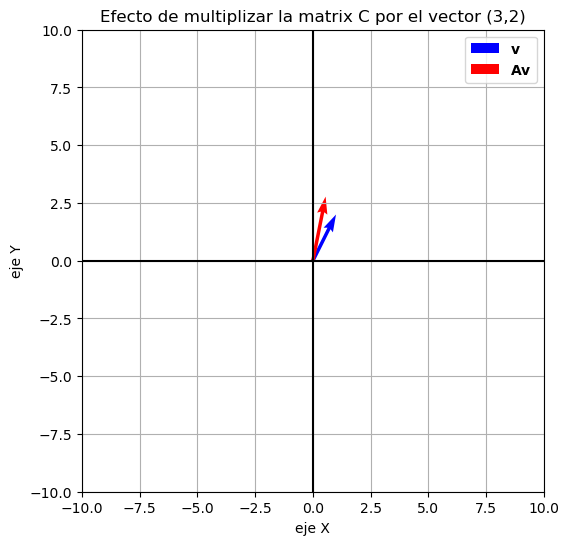

[ 0.55055914  2.77432598 -2.44948974]


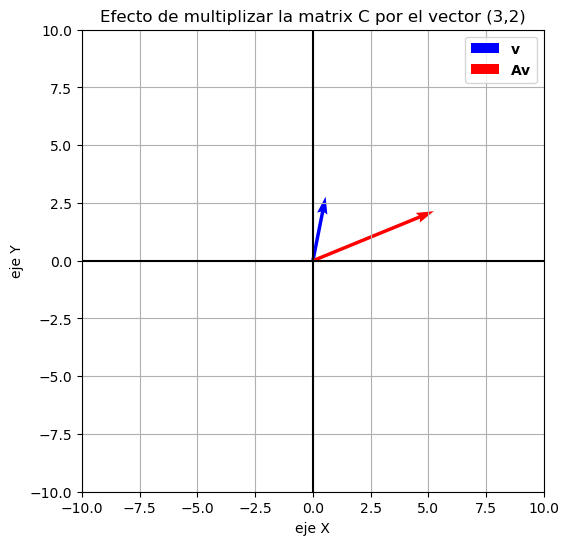

[5.23473393 2.14419231]


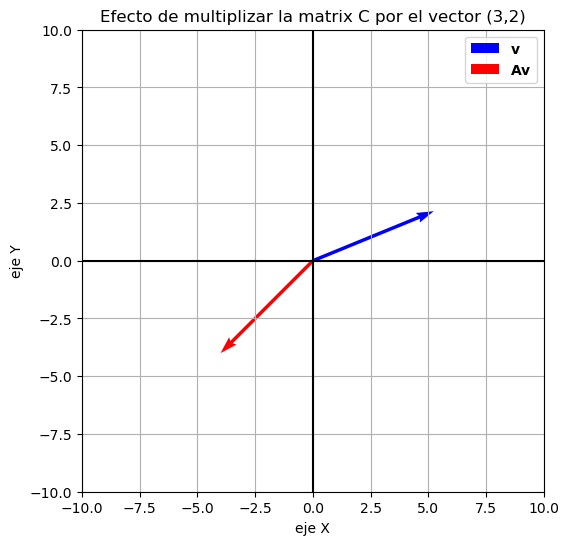

[-4. -4.]


In [15]:
v=np.array([1,2,-3])
graf_matmul(A,v)
print("\n"*3)
graf_matmul(Vt,v)
graf_matmul(Sigma,Vt@v)
graf_matmul(U,Sigma@Vt@v)

Así como en PCA tomamos sólo algunos componentes principales para reducir la dimensión de un problema, con SVD podemos hacer algo similar al tomar sólo algunos algunos vectores y valores SINGULARES de la factorización para **aproximar** a la matriz.

### Una aplicación de SVD

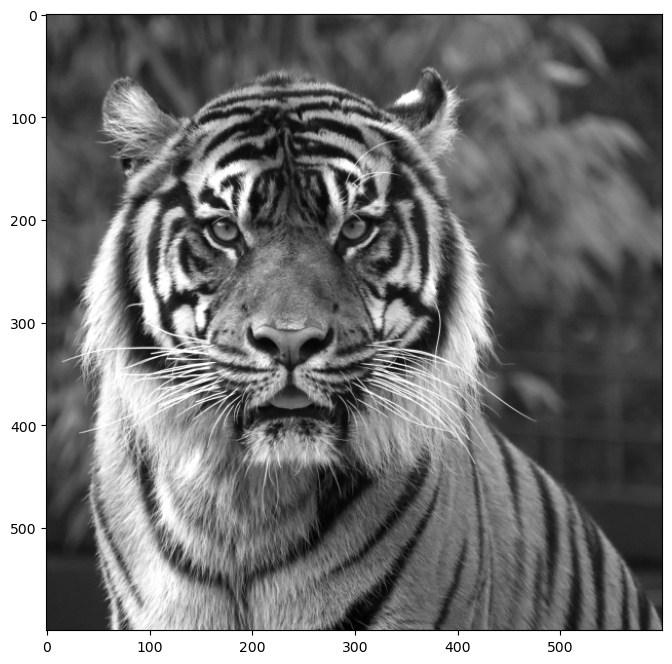

In [17]:
plt.rcParams["figure.figsize"]=[16,8]

A=imread("Tiger_pic.png")
X=np.mean(A,-1)
#convierte escala de grises. 

img=plt.imshow(X)
img.set_cmap('gray')



In [18]:
U,S,Vt=la.svd(X)